In [13]:
# 📌 Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 📌 Step 2: Define Tickers (Sample of NIFTY 50)
tickers = ["INFY.NS", "TCS.NS", "HDFCBANK.NS", "RELIANCE.NS", "ICICIBANK.NS"]

In [15]:
# ✅ Step 3: Download Adjusted Close Prices (auto_adjust set correctly)
data = yf.download(
    tickers,
    start="2023-01-01",
    end="2024-01-01",
    auto_adjust=False  # Important: so "Adj Close" is preserved
)["Adj Close"]

# Drop rows with any missing data
data = data.dropna()

[*********************100%***********************]  5 of 5 completed


In [16]:
# 📌 Step 4: Calculate Daily Returns
returns = data.pct_change().dropna()

In [17]:
# 📌 Step 5: Portfolio Weights (Equal)
weights = [1/len(tickers)] * len(tickers)

In [18]:
# 📌 Step 6: Portfolio Daily Returns
portfolio_returns = returns.dot(weights)

In [19]:
# 📌 Step 7: Cumulative Returns
cumulative_returns = (1 + portfolio_returns).cumprod()

In [20]:
# 📌 Step 8: Sharpe Ratio + Metrics
avg_return = portfolio_returns.mean()
volatility = portfolio_returns.std()
sharpe_ratio = (avg_return / volatility) * (252**0.5)

print("✅ Annualized Return: {:.2f}%".format(avg_return * 252 * 100))
print("✅ Annualized Volatility: {:.2f}%".format(volatility * (252 ** 0.5) * 100))
print("✅ Sharpe Ratio:", round(sharpe_ratio, 2))

✅ Annualized Return: 11.18%
✅ Annualized Volatility: 12.68%
✅ Sharpe Ratio: 0.88


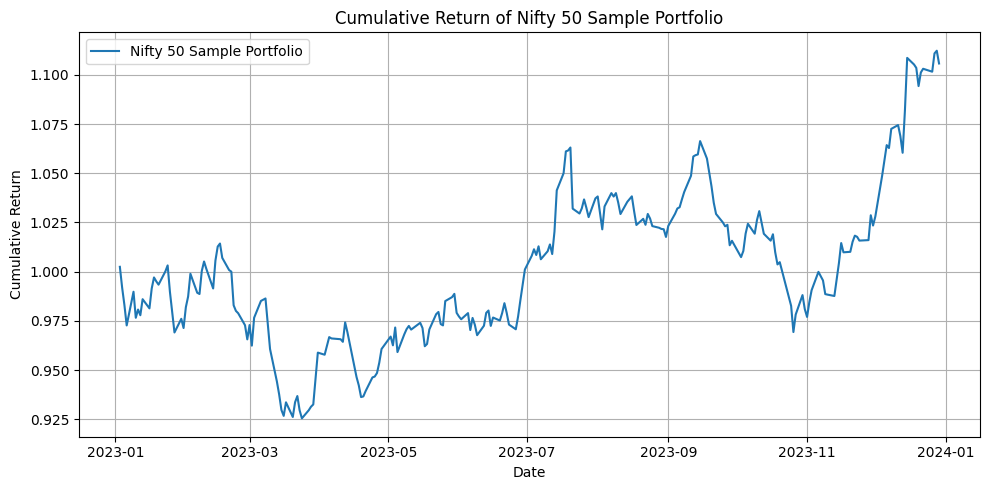

In [21]:
# 📌 Step 9: Plot Cumulative Return
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label="Nifty 50 Sample Portfolio")
plt.title("Cumulative Return of Nifty 50 Sample Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# 📌 Step 10: Export CSVs
cumulative_returns.to_csv("Day11_Nifty50_Portfolio_CumulativeReturn.csv")
returns.to_csv("Day11_Nifty50_Portfolio_DailyReturns.csv")
print("📁 Files saved successfully!")


📁 Files saved successfully!
